# Grondwaterformules.nl: de verlaging van een kleine onttrekking is maximaal bij een bepaalde kD
Het blijkt dat dit wel waar is, maar niets te maken heeft met de grootte van de onttrekking.

De dimensieloze verlaging in de situatie met semi-spanningswater (De Glee) is

$$\sigma = \frac{2 \pi}{Q} s = \frac{1}{T} K_0\left(\frac r \lambda\right),\,\,\,\,\,\lambda = \sqrt{Tc}$$

Voor het maximum of minimum van de verlaging als funtie van het doorlaatvermogen geldt:

$$\frac {\partial\sigma}{\partial T} = -\frac 1 {T^2} K_0\left(\frac r \lambda\right) + \frac 1 {2 T^2}\frac r \lambda K_1\left(\frac r \lambda\right) = 0 $$

Dus het punt met de maximale verlaging volgt uit:

$$K_0\left(\frac r \lambda\right) = \frac 1 2 \frac r \lambda K_1\left(\frac r \lambda\right) $$

Het bewuste aximum kan iteratie worden bepaald met de methode van Newton. Daarvoor stellen we de runctie $y$ op waarvan het nulpunt wordt gezocht. Dit kan iteratief worden bepaald mits we ook de afgetleide van $y$ naar T hebben:

$$y = K_0(z) - \frac 1 2 z K_1(z) = 0$$

$$y' = -K_1(z) + \frac 1 2 z K_0(z) = 0$$

Het nulpunt kan nu met Newton's methode iteratief worden bepaald.

$$z_k = z_{k-1} - \frac{y(z)}{y'(z)}$$

Het bewuste mulpunt $z=r/\lambda$ blijkt gelijk te zijn aan 1.5526512556453638

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import k0 as K0, k1 as K1
from itertools import cycle

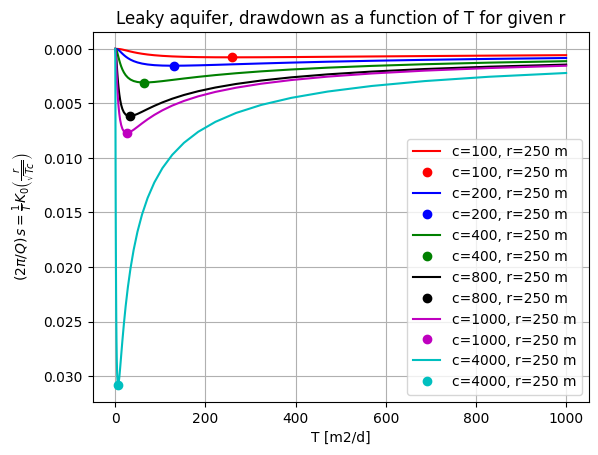

In [6]:
T = np.logspace(-1, 3.)
c = 300.
r = 250.

fig, ax = plt.subplots()
ax.set_title(r"Leaky aquifer, drawdown as a function of T for given r")
ax.set_xlabel(r"T [m2/d]")
ax.set_ylabel(r"$(2 \pi / Q) \, s = \frac{1}{T} K_0 \left(\frac{r}{\sqrt{T c}}\right)$")
ax.invert_yaxis()
ax.grid(True)
z = np.linspace(1, 5)

rho0 = 1.5526512556453638

clrs = cycle('rbgkmc')
for c in [100, 200, 400, 800, 1000., 4000.]:
    clr = next(clrs)
    L = np.sqrt(T * c)
    rho = r / L
    # ax.plot(T, 1 / T * K0(r / np.sqrt(T * c)), label=f"c={c:.4g}, r={r:.4g} m")
    ax.plot(T, 1 / T * K0(r / L), color=clr, label=f"c={c:.4g}, r={r:.4g} m")
    
    # Locatie van de maximale verlaging afhankelijk van de weerstand
    T0 = (r / rho0) ** 2 / c
    ax.plot(T0, 1 / T0 * K0(r / np.sqrt(T0 * c)), 'o', color=clr, label=f"c={c:.4g}, r={r:.4g} m")


ax.legend()



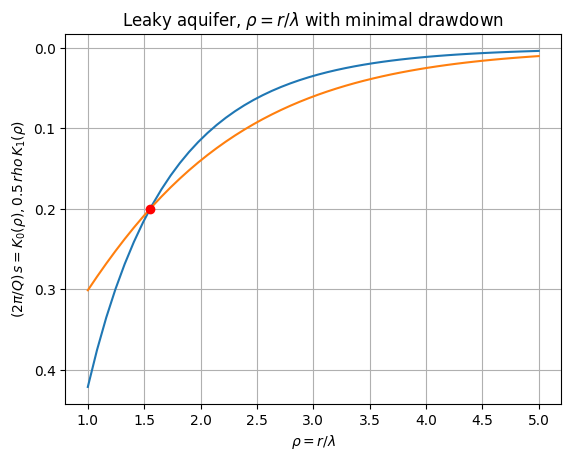

In [30]:
def y(z):
    return K0(z) - 0.5 * z * K1(z)
def yacc(z):
    return -K1(z) + 0.5 * z * K0(z)
def dydz(z):
    dz = 0.001
    return (y(z + 0.5 * dz) - y(z - 0.5 * dz))/dz

def get_z0(verbose=False):
    z = 1.
    for k in range(15):
        #z = z - y(z) / yacc(z)
        z = z - y(z) / dydz(z)
        if verbose:
            print(z)
    return z
    

fig, ax = plt.subplots()
ax.set_title(r"Leaky aquifer, $\rho = r /\lambda$ with minimal drawdown")
ax.set_xlabel(r"$\rho = r / \lambda$")
ax.set_ylabel(r"$(2 \pi / Q)\, s = K_0(\rho), 0.5 \, rho \, K_1(\rho)$")
ax.invert_yaxis()
ax.grid(True)
z = np.linspace(1, 5)
ax.plot(z, K0(z))
ax.plot(z, 0.5 * z * K1(z))
z0 = get_z0()
ax.plot(z0, K0(z0), 'ro')

